In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [59]:
#Load the dataset
df = pd.read_csv('movies.csv')

In [60]:
#check out the dataset
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data cleaning

In [61]:
#Check for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [62]:
#Check for missing values
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [63]:
#Drop rows with na
df.dropna(inplace=True)

In [64]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [65]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [66]:
#Change the datatype for budget and gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [67]:
#The released column is having country in it
text = df['released'].copy()

In [68]:
new_list = []
for dates in text:
    for a in dates.split('('):
        b = a.split(')')[-1]
        new_list.append(b)
#remove the empty elements in the list
new_list1 = [element for element in new_list if element != '']

In [69]:
#correct the released column and then convert the datatype to pandas datetime
df['released'] = new_list1
df['released'] = pd.to_datetime(df['released'])

In [70]:
#Lets compare the year column to the released column year
a = [df.released.dt.year == df.year]
np.unique(a)

array([False,  True])

In [71]:
#there are some incorrect year entries. to solve i will use the year from the released column
df['year'] = df['released'].dt.year

In [72]:
#duplicates dropping
df.drop_duplicates(inplace=True)

### Analysis

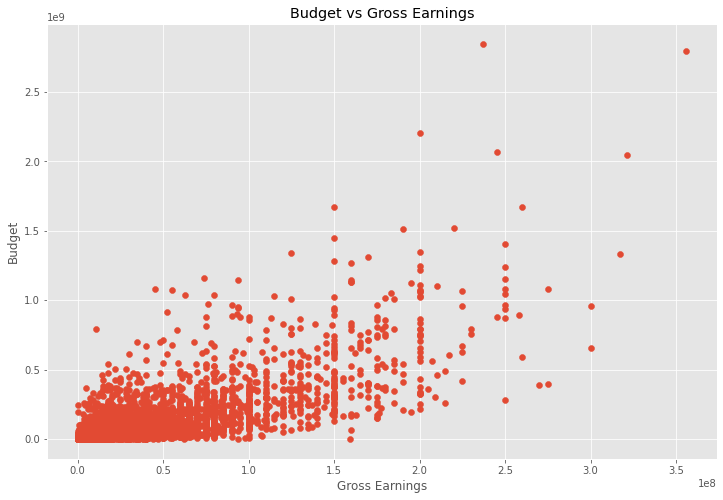

In [73]:
#scatter plot with budget vs gross
plt.scatter(x=df.budget, y=df.gross)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

Text(0, 0.5, 'Budget')

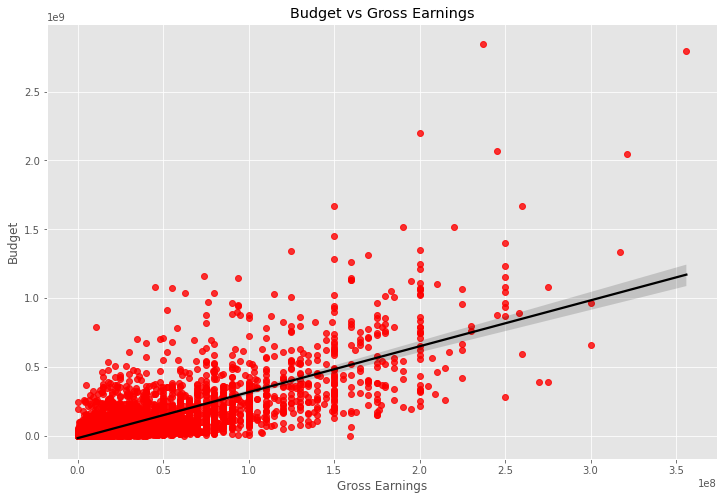

In [74]:
#plot the budget vs gross using the regplot
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

**There seems to be positive correlation between the two**

In [75]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


**High correlation between gross and budget***

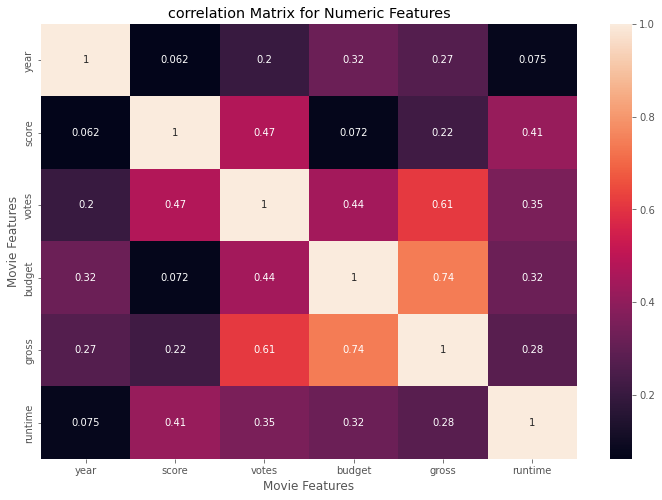

In [76]:
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [77]:
#Lets look at the columns that are not numeric
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1980-06-13,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1980-07-02,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1980-06-20,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1980-07-02,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1980-07-25,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,2020-01-17,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,2020-02-14,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,2020-01-17,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,2020-02-21,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


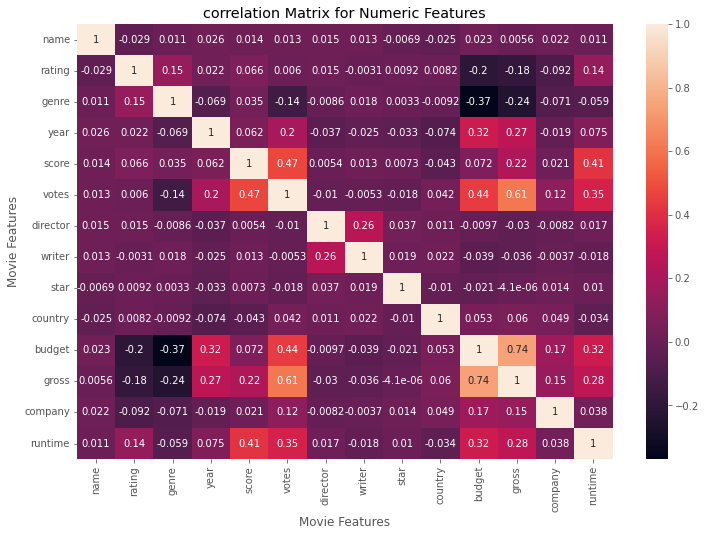

In [78]:
sns.heatmap(df_numerized.corr(method='pearson'), annot=True)
plt.title('correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [79]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pair

name     name       1.000000
         rating    -0.029234
         genre      0.010996
         year       0.025542
         score      0.014450
                      ...   
runtime  country   -0.034477
         budget     0.318695
         gross      0.275796
         company    0.037585
         runtime    1.000000
Length: 196, dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings